<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Identificando  Burger Master con MMG

El Burger Master es un evento creado en el 2016 por el *influencer* Tulio Zuluaga, más conocido en redes como Tulio recomienda, el cual busca que por una semana las hamburgueserías de cada ciudad ofrezcan su mejor producto a un precio reducido. 

El evento ha venido creciendo y en el 2022 se extendió por 21 ciudades de Colombia para las cuales se estimó que se vendieron más de dos millones de hamburguesas. El objetivo del presente caso-taller  es identificar los puntos calientes de hamburgueserías  que compitieron en  la ciudad de Bogotá aplicando el Modelo de Mezclas Gaussianas.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.


## Desarrollo

### 1. Carga de datos  

En la carpeta `data` se encuentra el archivo `burger_master.xlsx` para la ciudad de Bogotá, cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [4]:
#!pip install openpyxl

In [5]:
data_df = pd.read_excel("data/burger_master.xlsx")
data_df.head(5)

,Restaurante,Dirección,Descripción,Latitud,Longitud
0,MAIKKI,Cra 75 # 24D – 48,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.668833,-74.116828
1,MAIKKI,Calle 119 # 11A – 24,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.698395,-74.036585
2,MAIKKI,Cra 47A # 98 – 47,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.686401,-74.060144
3,FRENCHEESE,Calle 51 #22-55,"<p>Presentamos «La French Master», inspirada e...",4.639514,-74.073545
4,FRENCHEESE,Calle 80 #14-41,"<p>Presentamos «La French Master», inspirada e...",4.666147,-74.056758


In [6]:
print("cantidad de locales participantes: {}".format(data_df.shape[0]))
print("cantidad de restaurantes/franquicias participantes: {}".format(len(data_df["Restaurante"].unique())))
print()
print("cantidad de direcciones unicas {}".format(len(data_df["Dirección"].unique())))

cantidad de locales participantes: 137
cantidad de restaurantes/franquicias participantes: 63

cantidad de direcciones unicas 116


**Eliminar Duplicados**

In [7]:
data_df = data_df.drop_duplicates()
print("cantidad de locales participantes: {}".format(data_df.shape[0]))
print("cantidad de restaurantes/franquicias participantes: {}".format(len(data_df["Restaurante"].unique())))
print()
print("cantidad de direcciones unicas {}".format(len(data_df["Dirección"].unique())))

cantidad de locales participantes: 116
cantidad de restaurantes/franquicias participantes: 63

cantidad de direcciones unicas 116


In [8]:
data_gp = gpd.GeoDataFrame(data_df, geometry = gpd.points_from_xy(data_df.Longitud, data_df.Latitud))
data_gp.head()

,Restaurante,Dirección,Descripción,Latitud,Longitud,geometry
0,MAIKKI,Cra 75 # 24D – 48,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.668833,-74.116828,POINT (-74.11683 4.66883)
1,MAIKKI,Calle 119 # 11A – 24,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.698395,-74.036585,POINT (-74.03658 4.69839)
2,MAIKKI,Cra 47A # 98 – 47,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.686401,-74.060144,POINT (-74.06014 4.68640)
3,FRENCHEESE,Calle 51 #22-55,"<p>Presentamos «La French Master», inspirada e...",4.639514,-74.073545,POINT (-74.07355 4.63951)
4,FRENCHEESE,Calle 80 #14-41,"<p>Presentamos «La French Master», inspirada e...",4.666147,-74.056758,POINT (-74.05676 4.66615)


**columna Descripcion**

In [9]:
data_gp["Descripción"].str.split("<br/>")[0]

['<p>MAIKKI MACUIRA: Cama de chicharrón soplado, tocineta caramelizada en melao de maracuyá y panela de la hoya del rio Suárez, carne de res del Magdalena medio, queso fresco de pasta hilada, mayonesa de cilantro cimarrón del pacifico, cogollo de lechuga y pan artesanal. Un homenaje a lo nuestro. En pie de lucha por la comida rápida colombiana',
 '',
 'Cra 75 # 24D – 48, Modelia',
 'Calle 119 # 11A – 24, Santa Bárbara',
 'Cra 47A # 98 – 47, Castellana</p>']

Esta columna tiene informacion almacenada en formato html a continuacion se muestra la distribucion de la cantidad de caracteristicas almacenadas

In [10]:
data_gp["Descripción"].str.split("<br/>").apply(lambda x: len(x)).value_counts().sum(axis=0)

116

In [11]:
data_gp["Descripción"].str.split("<br/>").apply(lambda x: len(x)).value_counts()

1     44
5     17
13    11
4     10
10    10
6      8
9      7
8      6
7      3
Name: Descripción, dtype: int64

Se observa que 45 de los 137 participantes cuentan con al menos 1 caracteristica, el resto cuenta con 13 o mas caracteristicas. de todas estas la primera es la descripcion de la hamburguesa

In [12]:
data_gp["Descripción"].str.split("<br/>")[10]

['<p>En familia logramos componer una hamburguesa llena de sabor colombiano… Les presentamos LA CAQUETÁ: Hecha 100% con carne de res madurada súper jugosa; agregamos un toque cremoso y picante con nuestro alioli de aguacate; pico de gallo de cebolla, limón y repollo que aporta frescura y acidez; el sabor ahumado de nuestra tocineta y queso cheddar fundido. Con el propósito de resaltar nuestra cultura, adicionamos un autóctono chicharrón de queso Caquetá salado, gratinado con panela espolvoreada para darle el toque dulce de nuestra tierra.',
 '',
 'Autopista norte #146-48, Cedritos',
 'Av. Cra 24 #39B-20, Parkway',
 'Av. Calle 100#50-08, Pasadena',
 'Carrera 59a #136-95, Mall 138',
 'Cra 73a #51a-97, Normandía',
 'Av. Cra 45 #183a-66, C.C Autopista 184</p>']

**Conclusiones**
La base tenia registros duplicados que fue necesario eliminar, luego de esto se obtienen que existen 116 locales comerciales que participan en burguer master, de estos hay 63 marcas unicas participantes. los registros contienen una descripcion de la hamburguesa participante en la columna *Descripcion*

### 2.  Visualizando los datos

Visualice la ubicación de cada restaurante en un mapa interactivo. Añada un marcador para cada restaurante y la posibilidad de encontrar la descripción de la hamburguesa ofrecida en un pop-up. (Note que la columna Descripción contiene otra información adicional).

In [13]:
data_gp["descripcion_hamburguesa"] = data_gp["Descripción"].str.split("<br/>").str[0].str.replace("<p>","")

In [14]:
#importamos la librería
import folium

#Mapa base
map = folium.Map(location = [data_gp.Latitud.mean(), data_gp.Longitud.mean()], tiles = "OpenStreetMap", zoom_start = 10)
# Otras opciones de tiles
#Stamen Terrain, Toner, and Watercolor

#capa teatros
for i in range(0,len(data_gp)):
   folium.Marker(
      location=[data_gp.iloc[i]['Latitud'], data_gp.iloc[i]['Longitud']],
      popup=data_gp.iloc[i]['descripcion_hamburguesa']
   ).add_to(map)


#Display el mapa
map

In [15]:
# !pip install folium matplotlib mapclassify

In [16]:
from pyrosm import OSM, get_data

fp = get_data("Bogota")

# Inicializamos el lector para Buenos Aires
osm = OSM(fp)
capital= osm.get_boundaries(boundary_type='administrative',name="UPZ")
excluir = capital["name"] == "UPZs de Bogotá"
capital[~excluir].explore()

Downloaded Protobuf data 'Bogota.osm.pbf' (11.38 MB) to:
'/tmp/pyrosm/Bogota.osm.pbf'


In [17]:
#teatros = gpd.sjoin(teatros, capital)
data_gp_join = data_gp.sjoin(capital)
data_gp_join.shape

(230, 19)

In [18]:
4.837519, -74.077561
data_gp.shape

(116, 7)

Se observan los restaurantes que estan participando en la dinamica, adicionalmente se ve que hay restaurantes que participan fuera de la ciudad de bogota, estos participan en la ciudad vecina de chia.

Tenemos entonces marcadores para cada restaurante y la posibilidad de encontrar la descripcion de la hamburguesa con un pop-up

### 3.  Análisis de puntos calientes

Aplique el modelo de Mezclas Gaussianas para buscar clusters de restaurantes en Bogotá, mencione qué estructura de covarianza usó y explique por qué. Escoja el número óptimo de componentes, explicando el procedimiento y justificando su elección.

In [19]:
from sklearn.mixture import GaussianMixture

In [20]:
iter_covariance = ["full", "tied", "diag", "spherical"]
X = data_gp[['Longitud','Latitud']].values

dict_covariance_type = {}
for c in iter_covariance:
    n_components = np.arange(1, 100)
    models = [GaussianMixture(n, covariance_type=c, random_state=3).fit(X)
              for n in n_components]
    
    dict_covariance_type[c] = models

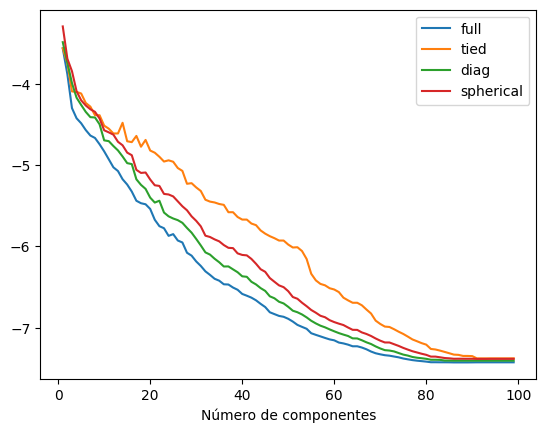

In [21]:
fig, ax = plt.subplots()
colors = plt.cm.tab10(np.arange(0,len(dict_covariance_type)))

for i,(k,models) in enumerate(dict_covariance_type.items()):
    ax.plot(n_components, [-m.score(X) for m in models], label=k, color = colors[i])

plt.xlabel('Número de componentes')    
plt.legend()
plt.show()

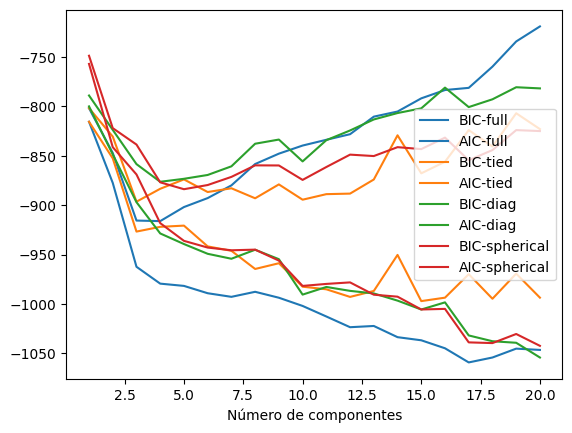

In [22]:
fig, ax = plt.subplots()
colors = plt.cm.tab10(np.arange(0,len(dict_covariance_type)*2))

for i,(k,models) in enumerate(dict_covariance_type.items()):

    ax.plot(n_components[:20], [m.bic(X) for m in models[:20]], label='BIC-{}'.format(k), color=colors[i])
    ax.plot(n_components[:20], [m.aic(X) for m in models[:20]], label='AIC-{}'.format(k), color=colors[i])

plt.xlabel('Número de componentes')    
plt.legend(loc='best')
plt.show()

Se aplica el metodo para distintos numeros de componentes, y distintos tipos de covarianza. para concer un poco mas de los efectos que estos tienen se miro la documentacion en (https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html) . Donde se ve que uno de los mas flexibles es el de la metodologia **full**. Esto lo vemos en la linea azul viendo que tiene una covarianza menor.

**full**: Cada componente tiene su propia matriz de covarianza general (completa). Se ajusta completamente a los datos.

**tied**: Todas las componentes comparten la misma matriz de covarianza.

**diag**: Cada componente tiene su propia matriz de covarianza, pero es diagonal (solo se ajusta a la varianza de cada característica, no a las correlaciones entre ellas).

**spherical**: Cada componente tiene una varianza única (escala), la misma en todas las direcciones, es decir, asume una forma esférica para cada cluster.

Se realizan las graficas de verosimilitud y de AIC, BIC para determinar cual sera el numero de componentes optimo. Para el criterio de verosimilitud vemos que los valores se estabilizan por encima de 80 componentes, sin embargo esto seria casi tener un grupo por restaurante. Por lo tanto se utilizaran los criterios de AIC y BIC para determinar los mejores puntos. Con dicho analisis se determina que entre 5 y 8 se pueden obtener buenos valores al observar la bajada del BIC y AIC pues despues de un tiempo el BIC aumenta, el BIC está más orientado a evitar el sobreajuste, favoreciendo modelos con menos componentes, lo que puede dar lugar a una mejor generalización.

Adicionalmente vemos que efectivamente el tipo de covarianza **full** es la de mejor desempeño. En conclusion se elige el tipo de covarianza **full** y un tamaño de componentes entre 5 y 8; en este caso sera **6**

#### 3.1. Visualización de los resultados

Visualice las densidades estimadas por el  mejor modelo estimado en la sección anterior usando un mapa de calor interactivo, discuta los resultados.

In [23]:
n_components = 6
best_GM = GaussianMixture(n_components, covariance_type="full", random_state=3).fit(X)

labels = best_GM.predict(X)
data_gp['cluster']=labels

colors = plt.cm.tab10(np.arange(0,n_components))
colors = ['red',
    'orange',
    'green',
    'purple',
    'cadetblue',
    'pink',
          'aqua',
          'yellow',
          'magenta',
          'lime'
         ]

def colorCall(val):
  val = int(val)
  return colors[val]

map = folium.Map(location = [data_gp.loc[:,"Latitud"].mean(), data_gp.loc[:,"Longitud"].mean()], tiles = "OpenStreetMap", zoom_start = 11)

#capa clusters de teatros
for lat, lon, c in zip(data_gp['Latitud'], data_gp['Longitud'], data_gp['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        fill_color = colorCall(c),
        fill=True,
        color=colorCall(c),
        fill_opacity=0.7,
        popup=c
        ).add_to(map)
    


#Display el mapa
map

In [24]:
import statsmodels.api as sm
import geojsoncontour

In [25]:
x = np.linspace(min(data_gp.Longitud), max(data_gp.Longitud), 100)
y = np.linspace(min(data_gp.Latitud), max(data_gp.Latitud), 100)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack(( xx.flatten(),yy.flatten()))

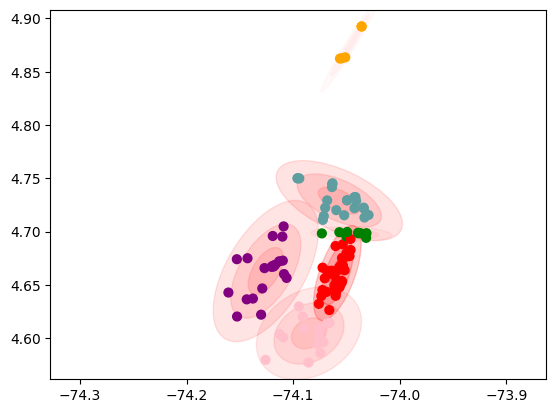

In [26]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Dibuja un elipse dado la media y varianza"""
    ax = ax or plt.gca()
    
    # Convierte las covarianzas
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Dibuja el elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, color="r", **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    colors_arr = [colors[l] for l in labels]
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=colors_arr, s=40, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        

        
X2 = data_gp[['Longitud','Latitud']].values        
colors = ['red',
        'orange',
        'green',
        'purple',
        'cadetblue',
        'pink',
        'aqua',
        'yellow',
        'magenta',
        'lime']
plot_gmm(best_GM, X2, label=True, ax=None)

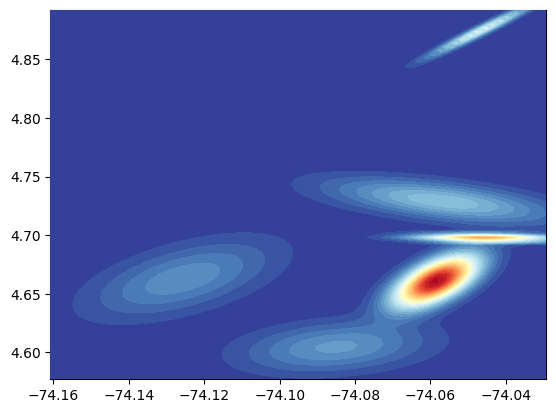

In [27]:
import scipy

plt.figure() 

#xx, yy = np.meshgrid(data_gp['Latitud'], data_gp['Longitud'])

pos = np.dstack((xx, yy))
gmm = 0
for k in range(len(best_GM.weights_)):
    mix_comp = scipy.stats.multivariate_normal(best_GM.means_[k,:].ravel(), best_GM.covariances_[k,:,:])
    gmm += best_GM.weights_[k]*mix_comp.pdf(pos)

#plt.plot(x, y, 'ko', alpha=0.3,color="orange")
contour_heat = plt.contourf(xx, yy, gmm,  alpha = 1.0, zorder=10, levels = 40, cmap="RdYlBu_r")    
# plt.xlim([-8,8]);
# plt.ylim([-6,6]);

geojson_contours = geojsoncontour.contourf_to_geojson(
    contourf=contour_heat,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

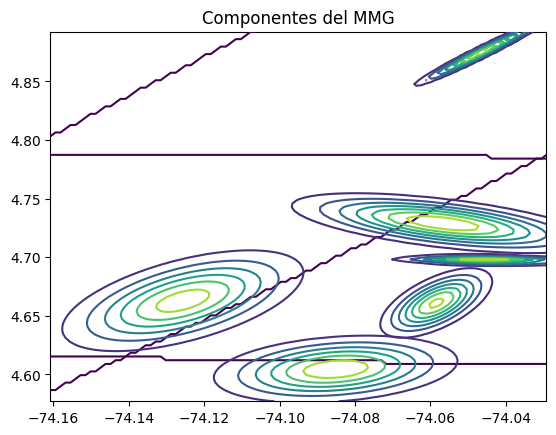

In [28]:
pos = np.dstack((xx, yy))

# Graficamos los puntos
plt.figure()
plt.title("Componentes del MMG")

for k in range(len(best_GM.weights_)):
    mvn = scipy.stats.multivariate_normal(best_GM.means_[k,:].ravel(), best_GM.covariances_[k,:,:])
    z = mvn.pdf(pos)
    plt.contour(xx, yy, z,  alpha = 1.0, zorder=10)

plt.show()

In [29]:
map = folium.Map(location = [data_gp.loc[:,"Latitud"].mean(), data_gp.loc[:,"Longitud"].mean()], tiles = "OpenStreetMap", zoom_start = 11)


for lat, lon, c in zip(data_gp['Latitud'], data_gp['Longitud'], data_gp['cluster']):
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        fill_color = colorCall(c),
        fill=True,
        color=colorCall(c),
        fill_opacity=0.4,
        popup=c
        ).add_to(map)

folium.GeoJson(
    geojson_contours,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'lineColor': '#FFFFFF',
        'opacity':   0.9,
    }).add_to(map)



map

Luego de elegir los **6** clusters, se observa como se comporta el GMM, contamos con 5 visualizaciones.

**primera**: mapa donde se indica el grupo al que pertenece cada uno de los restaurantes participantes.

**segunda**: Grafico de elipses que muestra como esta influyendo cada uno de los grupos en el espacio total

**tercera**:Mapa de calor en el cual se ve como una unica representacion la influencia de cada uno de los "cluster"

**cuarta**: nueva representacion de la influencia de cada "cluster" esta vez como *Silhouettes* 

**quinta**: Mapa interacctivo donde se ve un mapa de calor de la ubicacion de los restaurantes participantes en la dinamica de burguer master

Con este mapa se observa que la zona centro de la ciudad es la que tiene una mayor concentracion de restaurantes, en la parte norte y sur se ven dos regiones con menor concentracion, la zona al sur esta distribuida de una forma uniforme mientras que la zona en el norte es alargada abarcando de oriente a occidente de la ciudad. 

Hay dos grupos ubicados ene la zona cercana al aeropuerto, la mas cercana tiene una mayor concentracion de puntos, mientas que la siguiente es mas dispersa.

La ultima zona corresponde a la ciudad de chia donde en las bases originales se observa que hay restaurantes participantes.


Esto puede extrapolarse tambien a la densidad de poblacion que sabemos en Bogota viven y trabajan mas en esas zonas de Chapinero y Usaquen. Por lo que esperariamos tambien tener mayor concentracion ahi de restaurantes. La zona oriental al ser la zona mas poblada encontramos la mayor cantidad de restaurantes.

Debido a esta extrapolacion con la densidad podrimos decir que son agupaciones de calidad, por lo menos a primera vista no se ve tampoco que haya zonas atipicas donde no esperariamos encontrar restaurantes. Las zonas que este mapa nos muestra parece representar de una buena manera los participantes del Burger Master en Bogota y Chia. Esta ausencia de datos atipicos se da por haber definido un numero cercano al optimo de clusters, aunque como veremos ahora, si habian zonas que faltaban por ser reconocidas por el modelo.

### 4. Comparación con KDE

Estime ahora las densidades usando KDE bivariado de la librería `statsmodels` con el anchos de banda dado por `cv_ml`. Muestre los resultados usando un mapa interactivo. Compare los resultados obtenidos por el "mejor" modelo encontrado via MMG. 

In [30]:
import statsmodels.api as sm
import geojsoncontour

In [31]:
kdemultivariate = sm.nonparametric.KDEMultivariate(data=data_gp.loc[:,["Latitud", "Longitud"]], var_type='cc', bw="cv_ml")

In [32]:
x = np.linspace(min(data_gp.Longitud), max(data_gp.Longitud), 200)
y = np.linspace(min(data_gp.Latitud), max(data_gp.Latitud), 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack(( yy.flatten(),xx.flatten()))

In [33]:
preds_kde_bivariate = kdemultivariate.pdf(data_predict=grid)

<function matplotlib.pyplot.show(close=None, block=None)>

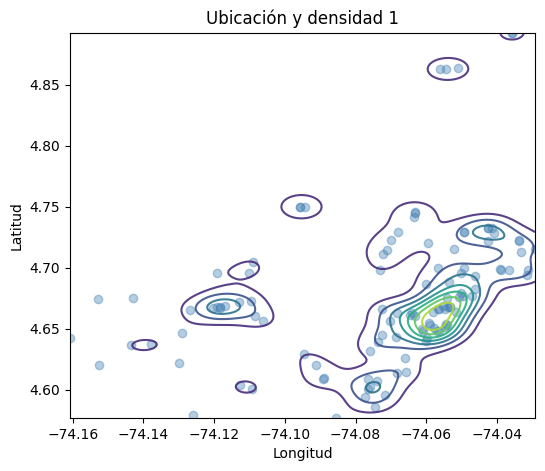

In [34]:
nrows = 1
ncols = int(1/nrows)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*6, ncols*5))
#axs = ax.flatten()

#centro_ciudad = (41.881998, -87.627800)


ax.scatter(data_gp.loc[:,"Longitud"], data_gp.loc[:,"Latitud"], color='steelblue', alpha=0.4)
ax.contour(
    xx, yy, preds_kde_bivariate.reshape(xx.shape),
    alpha=0.9
)

ax.set_title('Ubicación y densidad {}'.format(nrows))
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show

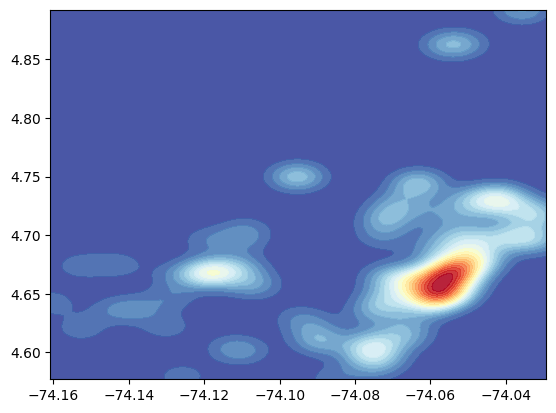

In [35]:
contourf = plt.contourf(xx, yy, preds_kde_bivariate.reshape(xx.shape),
        levels=20,alpha =0.9, linestyles='None', cmap="RdYlBu_r")

geojson_contours = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

In [36]:
map = folium.Map(location = [data_gp.loc[:,"Latitud"].mean(), data_gp.loc[:,"Longitud"].mean()], tiles = "OpenStreetMap", zoom_start = 11)

folium.GeoJson(
    geojson_contours,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'lineColor': '#FFFFFF',
        'opacity':   0.9,
    }).add_to(map)


map

Al encontrar los resultados por KDE vemos que tienen un parecido a los encontrados con GMM y que tambien se parece a la de la poblacion de Bogota. La zona oriental en donde se encuentra Usaquen y Chapinero sabemos que son las de densidad de poblacion mas alta en Bogota. Por lo tanto esperariamos encontrar tambien mayores restaurantes ahi, podriamos interpretar una correlacion con estos datos. 

Mientras que GMM separaba urbes mas grandes KDE tenia en cuenta otros datos que no se tuvieron en cuenta antes, como meter otras localidades que aunque de menor poblacion de restaurantes tiene una mejor precision tomando en cuenta no solo la zona cerca al aeropuerto como fontibon sino otras localidades como Puente Aranda, Kennedy y mayor precision en otras zonas que ya se tenian como Usaquen y Chia y hacia Cajica. 

Tanto KDE como GMM generan representaciones suavizadas de los datos, aunque el enfoque es distinto:
**KDE**: No asume ninguna estructura subyacente de los datos. KDE se basa en un enfoque no paramétrico y estima la densidad utilizando un kernel (una función de suavizado) que se ajusta alrededor de cada punto de los datos. El resultado es una función suavizada que refleja la distribución de los datos.

**GMM**: Es un enfoque paramétrico que asume que los datos provienen de una combinación de distribuciones gaussianas. Modela los datos como una suma ponderada de múltiples gaussianas, cada una con su propio centro y varianza, lo que permite capturar datos agrupados en diferentes distribuciones.

Por lo tanto aunque los resultados son muy parecidos el modelo con KDE otorga resultados no solo con mayor precision en las zonas que se tenian anteriormente, sino que tiene en cuenta otras que antes el modelo no fue capaz de encontrar. Por lo tanto podriamos decir que KDE genera un mejor modelo que el *"mejor"* modelo hecho por GMM. Sin embargo, si hablaramos del desempeño ambos presentan un buen despempeño GMM aunque no encuentra todos los datos subyacentes que KDE como otras localidades, si encuentra muy bien las partes mas importantes, si se quisiera un modelo que explique bastante bien los datos GMM y KDE son ambos muy buenos, si se quisiera entrar aun mas a detalle de otras zonas KDE podria resultar mejor.

El modelo hecho anteriormente lo podemos comparar abajo:

![Modelo generado GMM](data/GMM.png)